In [1]:
import pandas as pd
import geopandas as gd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

In [2]:
usa_geo = gd.read_file('data/usa_state.csv')
usa_arst = pd.read_csv('data/usa_arrests.csv', index_col=0)

In [3]:
usa_geo

,field_1,long,lat,group,order,region,subregion,geometry
0,1,-87.4620056152344,30.3896808624268,1,1,alabama,NA,None
1,2,-87.4849319458008,30.3724918365479,1,2,alabama,NA,None
2,3,-87.525032043457,30.3724918365479,1,3,alabama,NA,None
3,4,-87.53076171875,30.3323860168457,1,4,alabama,NA,None
4,5,-87.5708694458008,30.3266544342041,1,5,alabama,NA,None
...,...,...,...,...,...,...,...,...
15532,15595,-106.856628417969,41.0123176574707,63,15595,wyoming,NA,None
15533,15596,-107.309265136719,41.0180473327637,63,15596,wyoming,NA,None
15534,15597,-107.922332763672,41.0180473327637,63,15597,wyoming,NA,None
15535,15598,-109.056785583496,40.9893989562988,63,15598,wyoming,NA,None


In [4]:
regs = (
    usa_geo
    .groupby('region')[['long', 'lat']]
    .apply(lambda tbl: Polygon(tbl.values))
)

In [5]:
regs

region
alabama                 POLYGON ((-87.4620056152344 30.3896808624268, ...
arizona                 POLYGON ((-114.637390136719 35.0191802978516, ...
arkansas                POLYGON ((-94.051025390625 33.0367469787598, -...
california              POLYGON ((-120.006011962891 42.0092658996582, ...
colorado                POLYGON ((-102.055244445801 40.0096435546875, ...
connecticut             POLYGON ((-73.4990234375 42.049373626709, -73....
delaware                POLYGON ((-75.8023147583008 39.7288932800293, ...
district of columbia    POLYGON ((-77.1373062133789 38.9439430236816, ...
florida                 POLYGON ((-85.0154800415039 30.9970169067383, ...
georgia                 POLYGON ((-80.8901824951172 32.0397987365723, ...
idaho                   POLYGON ((-117.026634216309 42.0092658996582, ...
illinois                POLYGON ((-90.6419219970703 42.507740020752, -...
indiana                 POLYGON ((-88.0235061645508 37.7922973632812, ...
iowa                    POLYGON

In [6]:
regs.name = 'geometry'

In [7]:
regs.index = regs.index.str.title()

In [8]:
gdf = pd.merge(
    left=usa_arst,
    right=regs, 
    left_index=True,
    right_index=True,
    how='left',
)

In [9]:
gdf

,Murder,Assault,UrbanPop,Rape,state,geometry
Alabama,1.242564,0.782839,-0.520907,-0.003416,alabama,"POLYGON ((-87.4620056152344 30.3896808624268, ..."
Alaska,0.507862,1.106823,-1.211764,2.484203,alaska,NaN
Arizona,0.071633,1.478803,0.998980,1.042878,arizona,"POLYGON ((-114.637390136719 35.0191802978516, ..."
Arkansas,0.232349,0.230868,-1.073593,-0.184917,arkansas,"POLYGON ((-94.051025390625 33.0367469787598, -..."
California,0.278268,1.262814,1.758923,2.067820,california,"POLYGON ((-120.006011962891 42.0092658996582, ..."
Colorado,0.025715,0.398859,0.860809,1.864967,colorado,"POLYGON ((-102.055244445801 40.0096435546875, ..."
Connecticut,-1.030419,-0.729082,0.791723,-1.081741,connecticut,"POLYGON ((-73.4990234375 42.049373626709, -73...."
Delaware,-0.433474,0.806838,0.446294,-0.579946,delaware,"POLYGON ((-75.8023147583008 39.7288932800293, ..."
Florida,1.747671,1.970778,0.998980,1.138967,florida,"POLYGON ((-85.0154800415039 30.9970169067383, ..."
Georgia,2.206860,0.482855,-0.382735,0.487702,georgia,"POLYGON ((-80.8901824951172 32.0397987365723, ..."


In [10]:
gdf = gd.GeoDataFrame(gdf)

In [11]:
gdf.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape', 'state', 'geometry'], dtype='object')

<AxesSubplot: >

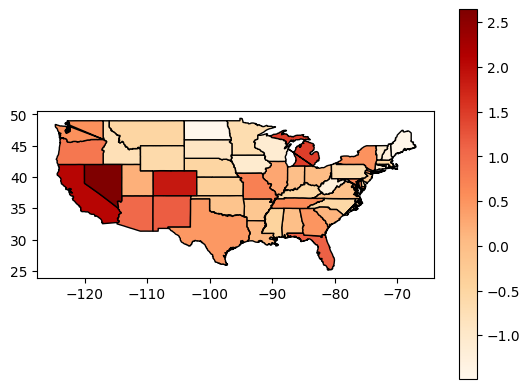

In [12]:
gdf.plot(column='Rape', cmap='OrRd', edgecolor='k', legend=True)